# 06-post-analysis

How can we verify if the trained models are correct in their predictions? 

One way is to verify against known candidates. 

In [1]:
import sys
sys.path.insert(0, "../")

import pandas as pd
from pathlib import Path
from src.visualization import visualize

data_dir = Path.cwd().parent.parent.parent / "data"
models_dir = Path.cwd().parent.parent.parent / "models" 

print("Current data directory {}".format(data_dir))

# Optional: Load the "autoreload" extension so that code can change
%load_ext autoreload

#OPTIONAL: Always reload modules so that as you change code in src, it gets loaded
%autoreload 2

Current data directory /Users/oliverhebnes/Documents/predicting-solid-state-qubit-material-hosts/data


In [2]:
known_candidates = ["SiC","SiGe", "C", "Si",
                         "GaN", "GaAs", "AlN", "ZnS", "ZnSe", "ZnO",
                         "AlP", "GaP", "AlAs", "ZnTe", "CdS"
                    ]
QD_2D_candidates = ["BN", "MoS2", "WSe2", "WS2",#2D
                    "InAs" #QD
                   ] 

In [3]:
title = "Empirical summary"
InsertApproach = "03-empirical-approach"
numberOfPrincipalComponents = 3

## Training set

In [4]:
trainingSet   = pd.read_pickle(data_dir / InsertApproach / "processed" / "trainingData.pkl")
trainingTarget   = pd.read_pickle(data_dir / InsertApproach / "processed" / "trainingTarget.pkl")
trainingSet["candidate"] = trainingTarget

In [5]:
trainingSet

material_id  full_formula  AtomicOrbitals|HOMO_character  \
0         mp-24            C8                            2.0   
1         mp-47            C4                            2.0   
2         mp-66            C2                            2.0   
3        mp-149           Si2                            2.0   
4        mp-165           Si4                            2.0   
..          ...           ...                            ...   
585  mp-1275839  Co4Bi24S8O64                            3.0   
586  mp-1291058  Sr4Mn2Mo2O12                            3.0   
587  mp-1291630       Fe12O16                            3.0   
588  mp-1298346     Sr8Co4O16                            3.0   
589  mp-1539137      Rb1Cr5S8                            3.0   

     AtomicOrbitals|HOMO_element  AtomicOrbitals|HOMO_energy  \
0                              6                   -0.199186   
1                              6                   -0.199186   
2                              6                   -0.199186   
3                             14                   -0.153293   
4                             14                   -0.153293   
..                           ...                         ...   
585                           27                   -0.322368   
586                           25                   -0.266540   
587                           26                   -0.295049   
588                           27                   -0.322368   
589                           24                   -0.118123   

     AtomicOrbitals|LUMO_character  AtomicOrbitals|LUMO_element  \
0                              2.0                            6   
1                              2.0                            6   
2                              2.0                            6   
3                              2.0                           14   
4                              2.0                           14   
..                             ...                          ...   
585                            3.0                           27   
586                            3.0                           25   
587                            3.0                           26   
588                            3.0                           27   
589                            3.0                           24   

     AtomicOrbitals|LUMO_energy  \
0                     -0.199186   
1                     -0.199186   
2                     -0.199186   
3                     -0.153293   
4                     -0.153293   
..                          ...   
585                   -0.322368   
586                   -0.266540   
587                   -0.295049   
588                   -0.322368   
589                   -0.118123   

     AtomicPackingEfficiency|dist from 1 clusters |APE| < 0.010  \
0                                             1.000000            
1                                             1.000000            
2                                             1.000000            
3                                             1.000000            
4                                             1.000000            
..                                                 ...            
585                                           0.034641            
586                                           0.052116            
587                                           0.091832            
588                                           0.057864            
589                                           0.033111            

     AtomicPackingEfficiency|dist from 3 clusters |APE| < 0.010  ...  \
0                                             1.000000           ...   
1                                             1.000000           ...   
2                                             1.000000           ...   
3                                             1.000000           ...   
4                                             1.000000           ...   
.. 

In [6]:
#trainingSet[["full_formula", "pretty_formula", "candidate"]][trainingSet["pretty_formula"].isin(known_candidates)]

## Test set
How many entries in our test set consists of known candidates?

In [7]:
Summary = pd.read_pickle(models_dir / InsertApproach /  "summary" / Path("PCA-" + str(numberOfPrincipalComponents) + "-" + "summary.pkl"))
Summary = Summary.reset_index(drop=True)
Summary.shape

generatedData = pd.read_pickle(data_dir / "interim" / "featurized" / "featurized-11-04-2021.pkl")
generatedData = generatedData[~generatedData["material_id"].isin(trainingSet["material_id"])].reset_index(drop=True)
Summary["MP BG"] = generatedData["MP_Eg"]

In [8]:
for known_candidate in known_candidates:
    with pd.option_context('display.max_rows', 100, 'display.max_columns', 12):
        print(known_candidate)
        display(Summary[Summary["pretty_formula"]==known_candidate])

SiC


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

SiGe


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

C


material_id full_formula pretty_formula  LOG   LOG Prob  DT   DT Prob  \
15379   mp-630227          C60              C   0.0  0.206493  1.0      1.0   
16142   mp-667273          C60              C   1.0  0.681262  1.0      1.0   
16394   mp-680372          C60              C   0.0  0.176863  1.0      1.0   
16471   mp-683919         C140              C   0.0  0.173944  1.0      1.0   
21326  mp-1194362          C28              C   0.0  0.070853  0.0      0.0   
22122  mp-1196583         C240              C   0.0  0.303150  1.0      1.0   
24096  mp-1203645          C48              C   0.0  0.029288  1.0      1.0   
24549  mp-1205417          C20              C   0.0  0.164554  0.0      0.0   

       RF    RF Prob  GB    GB Prob   MP BG  
15379  1.0  0.635565  1.0  0.999971  0.9100  
16142  1.0  0.775219  1.0  0.999971  1.2370  
16394  1.0  0.587719  1.0  0.999971  0.7132  
16471  1.0  0.621649  1.0  0.999971  1.1035  
21326  0.0  0.224308  0.0  0.000014  2.0672  
22122  1.0  0.690315  1.0  0.999971  1.3517  
24096  0.0  0.389130  1.0  0.999971  1.8637  
24549  0.0  0.049254  0.0  0.000014  4.1975

Si


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

GaN


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

GaAs


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

AlN


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

ZnS


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

ZnSe


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

ZnO


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

AlP


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

GaP


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

AlAs


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

ZnTe


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

CdS


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

In [9]:
Summary[Summary["pretty_formula"].isin(QD_2D_candidates)]

material_id full_formula pretty_formula  LOG   LOG Prob  DT    DT Prob  \
45         mp-344         B4N4             BN   1.0  0.788279  1.0  1.000000   
239       mp-1599         B4N4             BN   0.0  0.114662  1.0  1.000000   
242       mp-1639         B1N1             BN   1.0  0.993602  1.0  1.000000   
386       mp-2653         B2N2             BN   1.0  0.991121  1.0  1.000000   
3089     mp-13151         B4N4             BN   1.0  0.957644  1.0  0.888889   
5147     mp-20305       In1As1           InAs   1.0  0.989362  1.0  1.000000   
15771   mp-644751         B4N4             BN   1.0  0.917405  0.0  0.500000   
19242  mp-1077506         B3N3             BN   1.0  0.819076  0.0  0.500000   

       RF    RF Prob  GB    GB Prob   MP BG  
45     1.0  0.833500  1.0  0.999971  3.5021  
239    1.0  0.699846  1.0  0.999971  1.6009  
242    1.0  0.994811  1.0  0.999971  4.6482  
386    1.0  0.994811  1.0  0.999971  5.3630  
3089   1.0  0.934916  1.0  0.999971  4.8257  
5147   1.0  0.785632  1.0  0.999971  0.3050  
15771  1.0  0.802264  1.0  0.999971  5.6697  
19242  1.0  0.776329  0.0  0.000014  1.0837

In [10]:
atleast_one_model = Summary[(Summary["RF "] == 1) | 
                       (Summary["DT "] == 1) |
                       (Summary["GB "] == 1) | 
                       (Summary["LOG "] == 1)]

atleast_one_model.to_csv(models_dir / InsertApproach / "summary" / "atleast_one_model.csv")
atleast_one_model

material_id  full_formula pretty_formula  LOG   LOG Prob  DT    DT Prob  \
1            mp-7            S6              S   1.0  0.863157  1.0  0.888889   
2           mp-14           Se3             Se   1.0  0.961455  1.0  1.000000   
3           mp-19           Te3             Te   1.0  0.949674  1.0  1.000000   
4           mp-25            N8             N2   1.0  0.932378  1.0  1.000000   
5           mp-77           S32              S   1.0  0.553043  0.0  0.000000   
...           ...           ...            ...   ...       ...  ...       ...   
24525  mp-1205354       Sc8Se12         Sc2Se3   0.0  0.301776  1.0  1.000000   
24542  mp-1205392      Ag4Sb4S8         AgSbS2   0.0  0.132118  0.0  0.034965   
24567  mp-1207108   Ba1Al1Ge1H1        BaAlGeH   0.0  0.239666  0.0  0.000000   
24578  mp-1232407    Li6B6H32N4    Li3B3(H8N)2   0.0  0.015196  1.0  1.000000   
24591  mp-1238445  Be8H64N16F32     BeH8(NF2)2   0.0  0.005315  1.0  1.000000   

       RF    RF Prob  GB    GB Prob   MP BG  
1      1.0  0.646700  1.0  0.999971  2.4881  
2      1.0  0.800635  1.0  0.999971  1.0119  
3      1.0  0.726606  1.0  0.999971  0.5752  
4      0.0  0.428429  0.0  0.048922  7.4564  
5      0.0  0.173994  0.0  0.000013  2.7125  
...    ...       ...  ...       ...     ...  
24525  0.0  0.360545  1.0  0.840663  0.6558  
24542  0.0  0.216215  1.0  0.999617  1.4308  
24567  0.0  0.249571  1.0  0.998775  0.8928  
24578  0.0  0.225311  1.0  0.999971  5.9434  
24591  0.0  0.425486  1.0  0.999971  6.5561  

[1996 rows x 12 columns]

In [11]:
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10000):
    display(generatedData[["material_id", "MP_Eg", "MP|Polar SG"]][generatedData["pretty_formula"]=="RuC"])

material_id   MP_Eg  MP|Polar SG
18789  mp-1009792  0.7149            0

## How many entries does the models agree on? 

In [12]:
RF_DT_GB_LOG = Summary[(Summary["RF "] == 1) & 
                       (Summary["DT "] == 1) & 
                       (Summary["GB "] == 1) & 
                       (Summary["LOG "] == 1)]

RF_DT_GB_LOG.to_csv(models_dir / InsertApproach / "summary" / "RF_DT_GB_LOG.csv")
with pd.option_context('display.max_rows', 163, 'display.max_columns', 10000):

    display(RF_DT_GB_LOG[RF_DT_GB_LOG["MP BG"]>0.5])

material_id  full_formula pretty_formula  LOG   LOG Prob  DT    DT Prob  \
1            mp-7            S6              S   1.0  0.863157  1.0  0.888889   
2           mp-14           Se3             Se   1.0  0.961455  1.0  1.000000   
3           mp-19           Te3             Te   1.0  0.949674  1.0  1.000000   
8          mp-111           Ne1             Ne   1.0  0.958537  1.0  1.000000   
10         mp-137          Ge12             Ge   1.0  0.961587  1.0  1.000000   
...           ...           ...            ...   ...       ...  ...       ...   
20430  mp-1189451       Be4C4N8          BeCN2   1.0  0.753321  1.0  1.000000   
20475  mp-1189914   Zn2Si2Ag4S8    ZnSi(AgS2)2   1.0  0.541998  1.0  1.000000   
22305  mp-1197203  Cd4Ag8Ge4S16      CdAg2GeS4   1.0  0.540160  1.0  1.000000   
22543  mp-1198022          Ge34             Ge   1.0  0.955162  1.0  1.000000   
24202  mp-1204057      Si72O144           SiO2   1.0  0.741840  1.0  1.000000   

       RF    RF Prob  GB    GB Prob    MP BG  
1      1.0  0.646700  1.0  0.999971   2.4881  
2      1.0  0.800635  1.0  0.999971   1.0119  
3      1.0  0.726606  1.0  0.999971   0.5752  
8      1.0  0.713983  1.0  0.999971  11.8025  
10     1.0  0.720839  1.0  0.999971   0.8732  
...    ...       ...  ...       ...      ...  
20430  1.0  0.656415  1.0  0.999971   5.5354  
20475  1.0  0.635216  1.0  0.840663   1.6859  
22305  1.0  0.620816  1.0  0.840663   0.8351  
22543  1.0  0.893277  1.0  0.999971   0.6701  
24202  1.0  0.521963  1.0  0.999971   5.6518  

[235 rows x 12 columns]

In [13]:
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10000):

    display(Summary[(Summary["DT Prob"] > 0.8) & 
                    (Summary["GB Prob"] > 0.8) & 
                    (Summary["LOG Prob"] > 0.8)])

material_id full_formula pretty_formula  LOG   LOG Prob  DT    DT Prob  \
1            mp-7           S6              S   1.0  0.863157  1.0  0.888889   
2           mp-14          Se3             Se   1.0  0.961455  1.0  1.000000   
3           mp-19          Te3             Te   1.0  0.949674  1.0  1.000000   
8          mp-111          Ne1             Ne   1.0  0.958537  1.0  1.000000   
10         mp-137         Ge12             Ge   1.0  0.961587  1.0  1.000000   
...           ...          ...            ...   ...       ...  ...       ...   
19838  mp-1104326      Ho2V2O8          HoVO4   1.0  1.000000  1.0  1.000000   
20127  mp-1179832          Rb8             Rb   1.0  0.996161  1.0  1.000000   
20529  mp-1190284       Bi8Se9         Bi8Se9   1.0  0.993221  1.0  1.000000   
22113  mp-1196569  Mg17Si20O60   Mg17(SiO3)20   1.0  0.862320  1.0  0.888889   
22543  mp-1198022         Ge34             Ge   1.0  0.955162  1.0  1.000000   

       RF    RF Prob  GB    GB Prob    MP BG  
1      1.0  0.646700  1.0  0.999971   2.4881  
2      1.0  0.800635  1.0  0.999971   1.0119  
3      1.0  0.726606  1.0  0.999971   0.5752  
8      1.0  0.713983  1.0  0.999971  11.8025  
10     1.0  0.720839  1.0  0.999971   0.8732  
...    ...       ...  ...       ...      ...  
19838  1.0  0.767059  1.0  0.999971   0.8789  
20127  1.0  0.790900  1.0  0.999971   0.1103  
20529  1.0  0.806142  1.0  0.999971   0.2393  
22113  1.0  0.578673  1.0  0.999971   0.1226  
22543  1.0  0.893277  1.0  0.999971   0.6701  

[215 rows x 12 columns]

In [14]:
RF_DT_GB = Summary[(Summary["RF "] == 1) & 
                       (Summary["DT "] == 1) & 
                       (Summary["GB "] == 1)]

RF_DT_GB.to_csv(models_dir / InsertApproach / "summary" / "RF_DT_GB.csv")
RF_DT_GB

material_id full_formula pretty_formula  LOG   LOG Prob  DT    DT Prob  \
1            mp-7           S6              S   1.0  0.863157  1.0  0.888889   
2           mp-14          Se3             Se   1.0  0.961455  1.0  1.000000   
3           mp-19          Te3             Te   1.0  0.949674  1.0  1.000000   
8          mp-111          Ne1             Ne   1.0  0.958537  1.0  1.000000   
10         mp-137         Ge12             Ge   1.0  0.961587  1.0  1.000000   
...           ...          ...            ...   ...       ...  ...       ...   
22510  mp-1197923       C122O4          C61O2   0.0  0.092631  1.0  1.000000   
22543  mp-1198022         Ge34             Ge   1.0  0.955162  1.0  1.000000   
23672  mp-1202088     Mg4B8H32       Mg(BH4)2   0.0  0.083512  1.0  1.000000   
23899  mp-1202941     Mg4B8H32       Mg(BH4)2   0.0  0.090584  1.0  1.000000   
24202  mp-1204057     Si72O144           SiO2   1.0  0.741840  1.0  1.000000   

       RF    RF Prob  GB    GB Prob    MP BG  
1      1.0  0.646700  1.0  0.999971   2.4881  
2      1.0  0.800635  1.0  0.999971   1.0119  
3      1.0  0.726606  1.0  0.999971   0.5752  
8      1.0  0.713983  1.0  0.999971  11.8025  
10     1.0  0.720839  1.0  0.999971   0.8732  
...    ...       ...  ...       ...      ...  
22510  1.0  0.599130  1.0  0.999971   1.2642  
22543  1.0  0.893277  1.0  0.999971   0.6701  
23672  1.0  0.669846  1.0  0.999971   5.9263  
23899  1.0  0.679846  1.0  0.999971   6.1889  
24202  1.0  0.521963  1.0  0.999971   5.6518  

[382 rows x 12 columns]

In [15]:
Summary[(Summary["RF Prob"] > 0.75) & 
        (Summary["DT Prob"] > 0.75) & 
        (Summary["GB Prob"] > 0.75)]

material_id full_formula pretty_formula  LOG   LOG Prob  DT   DT Prob  \
2           mp-14          Se3             Se   1.0  0.961455  1.0      1.0   
13         mp-157           P4              P   1.0  0.953809  1.0      1.0   
28         mp-252       Be1Te1           BeTe   1.0  0.968671  1.0      1.0   
45         mp-344         B4N4             BN   1.0  0.788279  1.0      1.0   
58         mp-406       Cd1Te1           CdTe   1.0  0.989285  1.0      1.0   
...           ...          ...            ...   ...       ...  ...      ...   
19749  mp-1103410     Bi6Te4S2        Bi3Te2S   1.0  0.916891  1.0      1.0   
19838  mp-1104326      Ho2V2O8          HoVO4   1.0  1.000000  1.0      1.0   
20127  mp-1179832          Rb8             Rb   1.0  0.996161  1.0      1.0   
20529  mp-1190284       Bi8Se9         Bi8Se9   1.0  0.993221  1.0      1.0   
22543  mp-1198022         Ge34             Ge   1.0  0.955162  1.0      1.0   

       RF    RF Prob  GB    GB Prob   MP BG  
2      1.0  0.800635  1.0  0.999971  1.0119  
13     1.0  0.776768  1.0  0.999971  0.1151  
28     1.0  0.769932  1.0  0.999971  2.2113  
45     1.0  0.833500  1.0  0.999971  3.5021  
58     1.0  0.831607  1.0  0.999971  1.2285  
...    ...       ...  ...       ...     ...  
19749  1.0  0.809549  1.0  0.999971  0.1016  
19838  1.0  0.767059  1.0  0.999971  0.8789  
20127  1.0  0.790900  1.0  0.999971  0.1103  
20529  1.0  0.806142  1.0  0.999971  0.2393  
22543  1.0  0.893277  1.0  0.999971  0.6701  

[100 rows x 12 columns]

In [16]:
Summary[(Summary["RF "] == 1) &  
        (Summary["GB "] == 1)]

material_id full_formula pretty_formula  LOG   LOG Prob  DT    DT Prob  \
1            mp-7           S6              S   1.0  0.863157  1.0  0.888889   
2           mp-14          Se3             Se   1.0  0.961455  1.0  1.000000   
3           mp-19          Te3             Te   1.0  0.949674  1.0  1.000000   
8          mp-111          Ne1             Ne   1.0  0.958537  1.0  1.000000   
10         mp-137         Ge12             Ge   1.0  0.961587  1.0  1.000000   
...           ...          ...            ...   ...       ...  ...       ...   
22510  mp-1197923       C122O4          C61O2   0.0  0.092631  1.0  1.000000   
22543  mp-1198022         Ge34             Ge   1.0  0.955162  1.0  1.000000   
23672  mp-1202088     Mg4B8H32       Mg(BH4)2   0.0  0.083512  1.0  1.000000   
23899  mp-1202941     Mg4B8H32       Mg(BH4)2   0.0  0.090584  1.0  1.000000   
24202  mp-1204057     Si72O144           SiO2   1.0  0.741840  1.0  1.000000   

       RF    RF Prob  GB    GB Prob    MP BG  
1      1.0  0.646700  1.0  0.999971   2.4881  
2      1.0  0.800635  1.0  0.999971   1.0119  
3      1.0  0.726606  1.0  0.999971   0.5752  
8      1.0  0.713983  1.0  0.999971  11.8025  
10     1.0  0.720839  1.0  0.999971   0.8732  
...    ...       ...  ...       ...      ...  
22510  1.0  0.599130  1.0  0.999971   1.2642  
22543  1.0  0.893277  1.0  0.999971   0.6701  
23672  1.0  0.669846  1.0  0.999971   5.9263  
23899  1.0  0.679846  1.0  0.999971   6.1889  
24202  1.0  0.521963  1.0  0.999971   5.6518  

[397 rows x 12 columns]

In [17]:
Summary[Summary["LOG "]==1]

material_id     full_formula     pretty_formula  LOG   LOG Prob  DT   \
1            mp-7               S6                  S   1.0  0.863157  1.0   
2           mp-14              Se3                 Se   1.0  0.961455  1.0   
3           mp-19              Te3                 Te   1.0  0.949674  1.0   
4           mp-25               N8                 N2   1.0  0.932378  1.0   
5           mp-77              S32                  S   1.0  0.553043  0.0   
...           ...              ...                ...   ...       ...  ...   
22305  mp-1197203     Cd4Ag8Ge4S16          CdAg2GeS4   1.0  0.540160  1.0   
22543  mp-1198022             Ge34                 Ge   1.0  0.955162  1.0   
24167  mp-1203927         Mo8N4O30           Mo4N2O15   1.0  0.502027  0.0   
24202  mp-1204057         Si72O144               SiO2   1.0  0.741840  1.0   
24313  mp-1204533  Mg45Si32H58O138  Mg45Si32(H29O69)2   1.0  0.567129  0.0   

        DT Prob  RF    RF Prob  GB    GB Prob   MP BG  
1      0.888889  1.0  0.646700  1.0  0.999971  2.4881  
2      1.000000  1.0  0.800635  1.0  0.999971  1.0119  
3      1.000000  1.0  0.726606  1.0  0.999971  0.5752  
4      1.000000  0.0  0.428429  0.0  0.048922  7.4564  
5      0.000000  0.0  0.173994  0.0  0.000013  2.7125  
...         ...  ...       ...  ...       ...     ...  
22305  1.000000  1.0  0.620816  1.0  0.840663  0.8351  
22543  1.000000  1.0  0.893277  1.0  0.999971  0.6701  
24167  0.000000  0.0  0.205499  1.0  0.999814  0.1373  
24202  1.000000  1.0  0.521963  1.0  0.999971  5.6518  
24313  0.000000  1.0  0.512671  0.0  0.000014  4.3207  

[664 rows x 12 columns]

findfont: Font family ['Palatino Linotype'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Palatino Linotype'] not found. Falling back to DejaVu Sans.


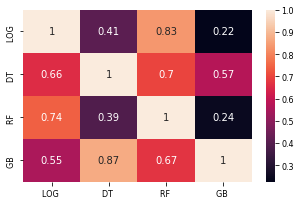

[1.0, 0.40709617180205415, 0.3062558356676004, 0.18259803921568626, 0.571078431372549, 0.38562091503267976, 0.24325980392156862, 1.0, 1.0, 0.22487745098039216, 0.7424698795180723]


LOG LOG LOG LOG   LOG LOG LOG DT   LOG LOG RF DT   \
LOG LOG LOG LOG                1.0         0.407096        0.306256   
LOG LOG LOG DT                 1.0         0.407096        0.306256   
LOG LOG RF DT                  1.0         0.407096        0.306256   
LOG RF GB DT                   1.0         0.407096        0.306256   
DT GB DT DT                    1.0         0.407096        0.306256   
DT RF DT DT                    1.0         0.407096        0.306256   
RF RF GB GB                    1.0         0.407096        0.306256   
RF RF RF RF                    1.0         0.407096        0.306256   
GB GB GB GB                    1.0         0.407096        0.306256   
GB LOG LOG LOG                 1.0         0.407096        0.306256   
RF LOG LOG LOG                 1.0         0.407096        0.306256   

                  LOG RF GB DT   DT GB DT DT   DT RF DT DT   RF RF GB GB   \
LOG LOG LOG LOG        0.182598      0.571078      0.385621       0.24326   
LOG LOG LOG DT         0.182598      0.571078      0.385621       0.24326   
LOG LOG RF DT          0.182598      0.571078      0.385621       0.24326   
LOG RF GB DT           0.182598      0.571078      0.385621       0.24326   
DT GB DT DT            0.182598      0.571078      0.385621       0.24326   
DT RF DT DT            0.182598      0.571078      0.385621       0.24326   
RF RF GB GB            0.182598      0.571078      0.385621       0.24326   
RF RF RF RF            0.182598      0.571078      0.385621       0.24326   
GB GB GB GB            0.182598      0.571078      0.385621       0.24326   
GB LOG LOG LOG         0.182598      0.571078      0.385621       0.24326   
RF LOG LOG LOG         0.182598      0.571078      0.385621       0.24326   

                  RF RF RF RF   GB GB GB GB   GB LOG LOG LOG   RF LOG LOG LOG   
LOG LOG LOG LOG            1.0           1.0         0.224877          0.74247  
LOG LOG LOG DT             1.0           1.0         0.224877          0.74247  
LOG LOG RF DT              1.0           1.0         0.224877          0.74247  
LOG RF GB DT               1.0           1.0         0.224877          0.74247  
DT GB DT DT                1.0           1.0         0.224877          0.74247  
DT RF DT DT                1.0           1.0         0.224877          0.74247  
RF RF GB GB                1.0           1.0         0.224877          0.74247  
RF RF RF RF                1.0           1.0         0.224877          0.74247  
GB GB GB GB                1.0           1.0         0.224877          0.74247  
GB LOG LOG LOG             1.0           1.0         0.224877          0.74247  
RF LOG LOG LOG             1.0           1.0         0.224877          0.74247

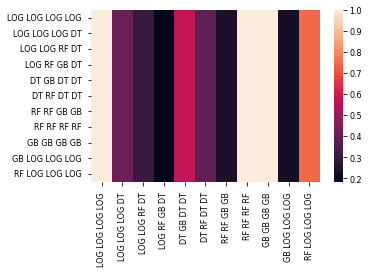

In [18]:
visualize.visualize_heatmap_of_combinations(Summary)

250


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 1647.37it/s]
findfont: Font family ['Palatino Linotype'] not found. Falling back to DejaVu Sans.


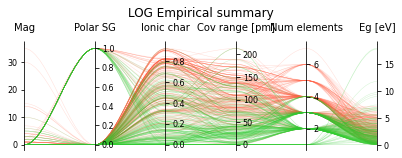

250


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 1042.07it/s]


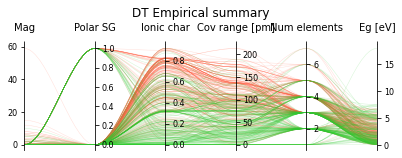

250


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 1175.99it/s]


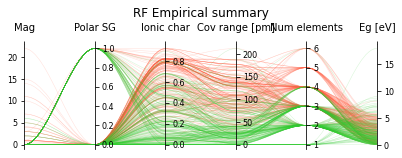

250


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 1779.86it/s]


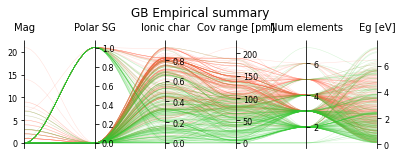

In [19]:
abbreviations = ["LOG ", "DT ", "RF ", "GB "]
for i in range(len(abbreviations)):
    generatedData["candidate"] = Summary[abbreviations[i]]
    visualize.make_parallel_coordinate_matplot(generatedData[Summary[abbreviations[i]]!=-1], InsertApproach+str(abbreviations[i]), title=str(abbreviations[i]) + "" + title, applyLegend=False)

In [20]:
if (InsertApproach == "03-insightful-approach") & (numberOfPrincipalComponents==3):
    abbreviations = ["LOG ", "DT ", "RF ", "GB "]
    visualize.plot_2D3Dcontours(trainingSet, trainingSet[["candidate"]].values.reshape(-1,), Summary, abbreviations, InsertApproach, 3)

In [21]:
visualize.plot_histogram_bg_proba(Summary)

100%|███████████████████████████████████████| 500/500 [00:00<00:00, 1438.88it/s]


/Users/oliverhebnes/Documents/predicting-solid-state-qubit-material-hosts/reports/figures/parallel_coordinates/summary-03-empirical-approach.pgf


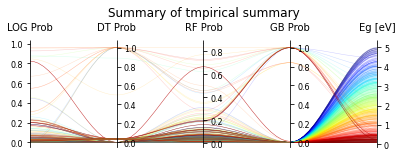

In [22]:
visualize.make_parallel_coordinate_matplot_summary(Summary, 
                                               InsertApproach, 
                                               title=str("Summary of t" + title[1:]), 
                                               applyLegend=False)

## Comparing the approaches

In [24]:
Summary_01 = pd.read_pickle(models_dir / "01-ferrenti-approach" /  "summary" / Path("PCA-" + str(176) + "-" + "summary.pkl"))
Summary_02 = pd.read_pickle(models_dir / "02-extended-ferrenti-approach" / "summary" / Path("PCA-" + str(176) + "-" + "summary.pkl"))
Summary_03 = pd.read_pickle(models_dir / "03-empirical-approach" / "summary" / Path("PCA-" + str(176) + "-" + "summary.pkl"))

In [25]:
list_mpid_03 = RF_DT_GB_LOG.material_id

In [26]:
list_mpid_02 = Summary_02[(Summary_02["RF "] == 1) & 
                          (Summary_02["DT "] == 1) & 
                          (Summary_02["GB "] == 1) & 
                          (Summary_02["LOG "] == 1)].material_id.values

list_mpid_01 = Summary_01[(Summary_01["RF "] == 1) & 
                          (Summary_01["DT "] == 1) & 
                          (Summary_01["GB "] == 1) & 
                          (Summary_01["LOG "] == 1)].material_id.values

list_mpid_00 = Summary_03[(Summary_03["RF "] == 1) & 
                          (Summary_03["DT "] == 1) & 
                          (Summary_03["GB "] == 1) & 
                          (Summary_03["LOG "] == 1)].material_id.values


In [27]:
print(list_mpid_00.shape, list_mpid_01.shape, list_mpid_02.shape, list_mpid_03.shape)

(214,) (6804,) (9227,) (298,)


In [28]:
overlapping_entries2 = list_mpid_03[list_mpid_03.isin(list_mpid_02)]
overlapping_entries1 = list_mpid_03[list_mpid_03.isin(list_mpid_01)]
overlapping_entries0 = list_mpid_03[list_mpid_03.isin(list_mpid_00)]

In [29]:
list_mpid_03

1              mp-7
2             mp-14
3             mp-19
8            mp-111
10           mp-137
            ...    
21927    mp-1196003
22113    mp-1196569
22305    mp-1197203
22543    mp-1198022
24202    mp-1204057
Name: material_id, Length: 298, dtype: object

In [30]:
print(Summary[Summary["material_id"].isin(overlapping_entries1)].shape)
print(Summary[Summary["material_id"].isin(overlapping_entries2)].shape)
print(Summary[Summary["material_id"].isin(overlapping_entries0)].shape)

(118, 12)
(165, 12)
(160, 12)


In [31]:
Summary[(Summary["material_id"].isin(overlapping_entries1)) & Summary["material_id"].isin(overlapping_entries2)]

material_id full_formula pretty_formula  LOG   LOG Prob  DT    DT Prob  \
13         mp-157           P4              P   1.0  0.953809  1.0  1.000000   
16         mp-189       Si4Ru4           SiRu   1.0  0.943256  1.0  1.000000   
45         mp-344         B4N4             BN   1.0  0.788279  1.0  1.000000   
76         mp-486        Ni2P4           NiP2   1.0  0.681474  1.0  1.000000   
119        mp-820       Hg1Se1           HgSe   1.0  0.973559  1.0  1.000000   
...           ...          ...            ...   ...       ...  ...       ...   
19325  mp-1078643     Rb1Na3H4        RbNa3H4   1.0  0.831443  1.0  0.888889   
19347  mp-1078780     Zn1Cd3S4        ZnCd3S4   1.0  0.916211  1.0  1.000000   
19549  mp-1093989          Na1             Na   1.0  0.997236  1.0  1.000000   
20317  mp-1188347        C12N8           C3N2   1.0  0.740853  1.0  1.000000   
21927  mp-1196003     Zn24As16         Zn3As2   1.0  0.647845  1.0  1.000000   

       RF    RF Prob  GB    GB Prob   MP BG  
13     1.0  0.776768  1.0  0.999971  0.1151  
16     1.0  0.749173  1.0  0.999971  0.2541  
45     1.0  0.833500  1.0  0.999971  3.5021  
76     1.0  0.546065  1.0  0.999971  0.5831  
119    1.0  0.760402  1.0  0.999971  0.1236  
...    ...       ...  ...       ...     ...  
19325  1.0  0.607458  1.0  0.999971  2.8273  
19347  1.0  0.841052  1.0  0.999971  1.2164  
19549  1.0  0.702494  1.0  0.999971  1.3527  
20317  1.0  0.519316  1.0  0.999971  3.7603  
21927  1.0  0.512860  1.0  0.840663  0.1349  

[77 rows x 12 columns]

In [32]:
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10000):

    display(Summary[Summary["material_id"].isin(overlapping_entries2)])

material_id full_formula pretty_formula  LOG   LOG Prob  DT   DT Prob  \
2           mp-14          Se3             Se   1.0  0.961455  1.0      1.0   
3           mp-19          Te3             Te   1.0  0.949674  1.0      1.0   
10         mp-137         Ge12             Ge   1.0  0.961587  1.0      1.0   
13         mp-157           P4              P   1.0  0.953809  1.0      1.0   
16         mp-189       Si4Ru4           SiRu   1.0  0.943256  1.0      1.0   
...           ...          ...            ...   ...       ...  ...      ...   
19549  mp-1093989          Na1             Na   1.0  0.997236  1.0      1.0   
20317  mp-1188347        C12N8           C3N2   1.0  0.740853  1.0      1.0   
20430  mp-1189451      Be4C4N8          BeCN2   1.0  0.753321  1.0      1.0   
21927  mp-1196003     Zn24As16         Zn3As2   1.0  0.647845  1.0      1.0   
22543  mp-1198022         Ge34             Ge   1.0  0.955162  1.0      1.0   

       RF    RF Prob  GB    GB Prob   MP BG  
2      1.0  0.800635  1.0  0.999971  1.0119  
3      1.0  0.726606  1.0  0.999971  0.5752  
10     1.0  0.720839  1.0  0.999971  0.8732  
13     1.0  0.776768  1.0  0.999971  0.1151  
16     1.0  0.749173  1.0  0.999971  0.2541  
...    ...       ...  ...       ...     ...  
19549  1.0  0.702494  1.0  0.999971  1.3527  
20317  1.0  0.519316  1.0  0.999971  3.7603  
20430  1.0  0.656415  1.0  0.999971  5.5354  
21927  1.0  0.512860  1.0  0.840663  0.1349  
22543  1.0  0.893277  1.0  0.999971  0.6701  

[165 rows x 12 columns]

In [33]:
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10000):

    display(Summary[Summary["material_id"].isin(overlapping_entries0)])

material_id full_formula pretty_formula  LOG   LOG Prob  DT    DT Prob  \
1            mp-7           S6              S   1.0  0.863157  1.0  0.888889   
2           mp-14          Se3             Se   1.0  0.961455  1.0  1.000000   
3           mp-19          Te3             Te   1.0  0.949674  1.0  1.000000   
8          mp-111          Ne1             Ne   1.0  0.958537  1.0  1.000000   
10         mp-137         Ge12             Ge   1.0  0.961587  1.0  1.000000   
...           ...          ...            ...   ...       ...  ...       ...   
19392  mp-1079201       B2C4N2           BC2N   1.0  0.982902  1.0  0.888889   
19507  mp-1080659        Os4C4            OsC   1.0  0.746154  1.0  0.888889   
22113  mp-1196569  Mg17Si20O60   Mg17(SiO3)20   1.0  0.862320  1.0  0.888889   
22543  mp-1198022         Ge34             Ge   1.0  0.955162  1.0  1.000000   
24202  mp-1204057     Si72O144           SiO2   1.0  0.741840  1.0  1.000000   

       RF    RF Prob  GB    GB Prob    MP BG  
1      1.0  0.646700  1.0  0.999971   2.4881  
2      1.0  0.800635  1.0  0.999971   1.0119  
3      1.0  0.726606  1.0  0.999971   0.5752  
8      1.0  0.713983  1.0  0.999971  11.8025  
10     1.0  0.720839  1.0  0.999971   0.8732  
...    ...       ...  ...       ...      ...  
19392  1.0  0.966740  1.0  0.999971   1.1736  
19507  1.0  0.701527  1.0  0.999971   0.2733  
22113  1.0  0.578673  1.0  0.999971   0.1226  
22543  1.0  0.893277  1.0  0.999971   0.6701  
24202  1.0  0.521963  1.0  0.999971   5.6518  

[160 rows x 12 columns]